En este notebook vamos a mostrar una forma de resolver el problema de mínimos cuadrados como un caso particular de problema de optimización no lineal.

Lo primero es cargar las bibliotecas que nos interesan


In [11]:
import numpy as np
import scipy as sp
import scipy.optimize as spo
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

Lo segundo es crear los datos $(x_i, y_i)$, que en este caso vamos a usar un caso muy sencillito, que sean datos que se obtienen al evaluar la función $y=x + 1$.


In [10]:
xdata = [1,2,3]
ydata = [2,3,4]


Y ahora graficamos esos datos:

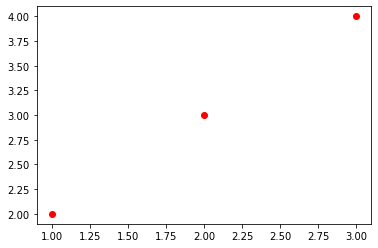

In [3]:
plt.plot(xdata, ydata, 'ro')
plt.show()

Perfecto.  Ahora definimos una función parámetrica, que depende de la x y de un conjunto de parámetros.  En este caso vamos a definir una recta:

$f(x,p) = p_1 x + p_2$

En Python, eso lo podemos hacer con una función que depende de dos variables:


In [4]:
def fp(x,p):
    return 2000

También vamos a definir una función en python que reciba un vector de parámetros $p$ y grafique la función en el intervalo $[min(xdata), max(xdata)]$, para ese vector de parámetros $p$.  También vamos a pedirle que grafique lo datos.


In [5]:
def plot_fp(p):
    "Plots the function fp with parameter p in the interval (a,b)"
    # here we get the min and max of the data
    a = np.min(xdata)
    b = np.max(xdata)
    # generate a set of x points in the interval min(xdata), max(ydata)
    xplot = np.linspace(a,b,100)
    # evaluate the generated points in the function with the parameter p
    yplot = fp(xplot,p)
    # plot the data
    plt.plot(xdata,ydata,'ro')
    # plot the function
    plt.plot(xplot,yplot,'b')

De los puntos xdata y ydata tenemos que evidentemente la recta que más se parece a esos puntos es la recta $y = x + 1$.  

Si consideramos la recta $y = x + 1$, como una instancia de la función $f(x,p)$, $p$ tendría el valor $[1,1]$.

Por si acaso, vamos a comprobar que en efecto, cuando graficamos la función $f(x,p)$ con $p = [1,1]$, se obtiene una recta que pasa por los puntos dados.


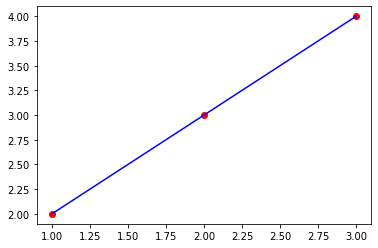

In [6]:
plot_fp([1,1])


En efecto, ahí tenemos la función que pasa por los puntos que queríamos.

Ahora, lo interesante sería poder determinar el valor del vector $p$ de manera automática, sin tener que mirar los datos y tratar de adivinar nosotros a mano.  Sería muy lindo si lográramos calcular ese valor de $p$ de manera automática.  Y eso se puede hacer resolviendo un problema de mínimos cudrados :-).


El problema de mínimos cuadrados es el siguiente: dado un conjunto de datos de la forma $D= \{(x_i, y_i), x_i \in \mathbb{R}, y_i \in \mathbb{R}, i=\overline{1,n}\}$, y una función parámetrica $f(x,p)$, se desea encontrar los valores del parámetro $p$ que haga que el error cuadrático sea lo más pequeño posible.  

El error cuadrático para un valor del parámetro $p$ se define como:

$\displaystyle E(p) = \sum_{i=1}^n \left(f(x_i,p) - y_i\right)^2$

De forma que si el error cuadrático es 0, con ese valor de $p$ la función $f(x,p)$ pasa por todos los puntos $(x_i,y_i)$, y mientras más pequeño sea el valor de $E(p)$, mejor es la aproximación de la función.

Vamos a definir la función error cuadrático para los datos (xdata,ydata) y la función fp(x,p).


In [7]:
def error_cuadratico(p):
    error = 0
    for i in range(len(xdata)):
        error = error + (fp(xdata[i],p) - ydata[i])**2
    return error

Y solo para comprobar, vamos a evaluar la función en $p=[1,1]$, el resultado debería ser 0.

In [8]:
print(error_cuadratico([1,1]))

0


Perfecto, vamos a probar con otro valor de $p$:

In [9]:
print(error_cuadratico([1,2]))

3


Tiene sentido.  Con el valor $p=[1,1]$ se obtiene el menor error posible (que es 0).  Con cualquier otro valor de $p$ se obtiene valores más grandes.

Entonces, llegado este punto, lo que tendríamos que hacer es resolver el problema de optimiziación de los mínimos cuadrados.  

Afortunadamente, hay una función en Python que nos permite hacer justamente eso.


Lo que queremos hacer con la función $f(x,p)$ es minimizarla.  Afortunadamente hay una función en scipy que se llama minimize, que recibe una función y ¡adivinen qué hace! :-o.

*PAUSA DRAMÁTICA PARA QUE LA PERSONA QUE ESTÁ LEYENDO DIGA EN SU MENTE QUE EL COMANDO minimize MINIMIZA LA FUNCIÓN QUE SE LE PASE COMO ARGUMENTO.*

Exacto, la función minimize devuelve el mínimo de una función :-).

Vamos a usarlo.  Para usar la función hay que precisar un par de detallitos.  

El primero es que la función está en el módulo optimize de scipy.
El segundo es que en realidad la función recibe dos argumentos, la función a la que se le está buscando el mínimo, y un punto inicial.  El punto inicial ahora no es importante, así que puede ser cualquiera.  Por eso, vamos a poner de primero el [0,0].


In [10]:
results = spo.minimize(error_cuadratico, [0,0])
print(results)

      fun: 9.394545235545695e-13
 hess_inv: array([[ 0.24991994, -0.50026157],
       [-0.50026157,  1.16581203]])
      jac: array([7.18980393e-06, 3.38094479e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.00000008, 1.0000004 ])


Perfecto.  Eso nos dio cantidad de información, pero de toda esa información lo más relevante ahora para nosotros son tres elmentos: fun, x y success.


- fun: indica cuánto vale la función objetivo en el punto que devolvió el algoritmo.  En este caso es 9.39e-13.  Ese e-13 significa que el número está multiplicado por $10^{-13}$ :-o.  O sea, podemos asumir que es 0.

- x: es el punto que encontró el algoritmo.  En este caso es $[1.00000008, 1.0000004]$, que es casi el $[1,1]$.

- success: es un valor booleano que es True si el algoritmo cree que encontró un mínimo.  

Aquí se pueden dar varios casos: que el algoritmo crea que terminó, pero en realidad no haya encontrado un mínimo.  Que sí lo haya encontrado y crea que no, y cualquier otra combinación.  Por eso es importante analizar los tres elementos: success, el valor de la función (fun) y el punto x.  

En este caso no tenemos problemas porque él cree que lo encontró y en efecto, lo encontró.

La forma de comprobar cuán buena es la solución sería graficar la función $f(x,p)$ con el valor de $p$ que devolvió el algoritmo.

Hagámoslo :-)


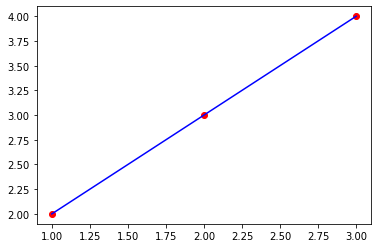

In [11]:
plot_fp(results.x)


Bueno, como esperábamos, todo salió bien :-).  Veamos un ejemplo más interesante ;-).

Lo ideal sería empezar esta sección con la imagen, antes de tener los datos, pero como esto es un /notebook/, me temo que eso no va a poder ser :-(, así que empecemos generando los datos de la parábola.


In [1]:
xdata = range(0, 14)
ydata = np.full(15, 2000)



NameError: name 'np' is not defined

Ahí generamos 20 puntos entre 0 y 5 y los datos de los $y_i$ ahora se corresponden con los de la parábola:

$y= 2x^2 + 3 x - 5$.

Solo para comprobarlo, vamos a graficar esos puntos:


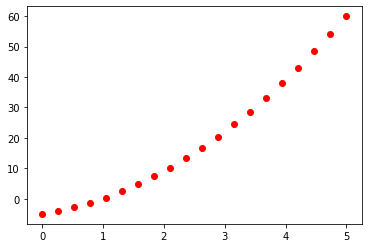

In [13]:
plt.plot(xdata, ydata, 'ro')


Perfecto.  Ahora lo que tocaría es definir la nueva función paramétrica, que sería una parábola de la forma $f(x,p) = p_2 x^2 + p_1 x + p_0$.

Vamos a programar esa nueva función $f(x,p)$:


In [14]:
def fp(x,p):
    return p[2]*x**2 + p[1]*x + p[0]

Solo para comprobar, vamos a evaluar la función en el punto 1, con el vector $p=[1,0,1]$


In [15]:
print(fp(1,[1,0,1]))

2


Bueno...  parece que fuciona.  Solo para comprobar, vamos a ver qué tal aproxima a esos datos ese vector.  Para eso usamos la función plot_fp.


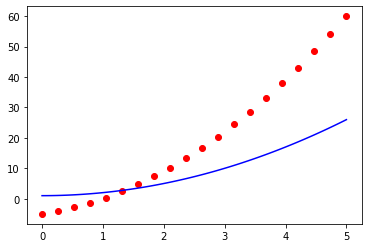

In [16]:
plot_fp([1,0,1])

Bueno, del gráfico, queda claro que ese vector $p$ no es el que mejor ajusta los datos.

Solo para comprobar, vamos a calcular el error cuadrático:


In [17]:
print(error_cuadratico([1,0,1]))

5052.672401224667


Uffff...  un error cuadrático de más de 5000...  eso está en candela...  La buena noticia es que eso se resuelve fácil, con la función minimize.

El detalle es que ahora el punto inicial que le pasemos a la función minimize debe tener tres componentes.  Ese es el único detalle que debemos revisar siempre.  Una vez más, vamos a empezar con el vector nulo.


In [18]:
results2 = spo.minimize(error_cuadratico, [0,0,0])
print(results2)

      fun: 1.2040886682799096e-12
 hess_inv: array([[ 0.18540907, -0.14436409,  0.02344464],
       [-0.14436409,  0.15932963, -0.02969477],
       [ 0.02344464, -0.02969477,  0.00593902]])
      jac: array([-2.21351891e-06, -1.25485441e-05, -4.07507417e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 12
     njev: 50
   status: 2
  success: False
        x: array([-5.00000018,  3.00000036,  1.99999991])


Ajá...  Vamos a analizar los resultados de la optimización :-).

Por un lado, encontró el vector 

[-5.00000018,  3.00000036,  1.99999991]

que se parece mucho al verdadero vector: [-5, 3, 2].  Por otro lado, el valor de la función en el punto que encontró es $10^{-12}$ :-o...  y aún así dice que cree que no lo encontró :shrug:.

De todas formas, con un error cuadrático de $10^{-12}$, podemos considerar que resolvimos el problema :-D.


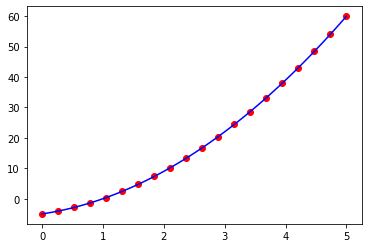

In [19]:
plot_fp(results2.x)

Bueno, como era de esperar, funciona perfectamente.


Y llegado este punto ya podemos decir que sabemos resolver el problema de mínimos cuadrados.  Lo único que necesitamos es:
1. tener los datos
2. graficar los datos para ver la forma de la función
3. definir la función paramétrica
4. resolver el problema de optimización.

A modo de ejemplo, supongamos que los datos son los que se muestran en la imagen (y supongamos también que miras la imagen sin leer el código :-|)


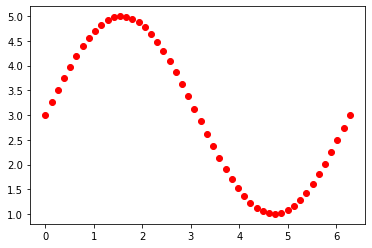

In [20]:
xdata = np.linspace(0,6.28,50)
ydata = 3 + 2*np.sin(xdata)

plt.plot(xdata,ydata, 'ro')


En este caso podemos apreciar varias cosas.  La primera es que es una función seno, peeeeero que está corrida en el eje Y.  En vez de empezar en 0 empieza en 3.  Lo otro es que en vez de tener amplitud 1, tiene amplitud 2 (porque va desde 3 hasta 5 y desde 3 hasta 1).

El tercer punto sería definir la función paramétrica, que pudiera ser 

$f(x,p) = p_1 \sin(x) + p_2$.

Vamos a programarla y minmizar el error cuadrático medio:


In [21]:
def fp(x,p):
    return p[0] * np.sin(x) + p[1]

Minimicemos el error cuadrático y grafiquemos.

Empezamos con un vector de dos elementos (porque solo hay dos parámetros)


In [22]:
results3 = spo.minimize(error_cuadratico, [0,0])
print("fun: " + str(results3.fun))
print("success: " + str(results3.success))
print("x: " + str(results3.x))


fun: 1.5725373927165307e-12
success: True
x: [1.99999979 2.9999999 ]


Perfecto :-).  Incluso el algoritmo dice que encontró el óptimo :-).  Vamos a comprobarlo gŕaficamente.


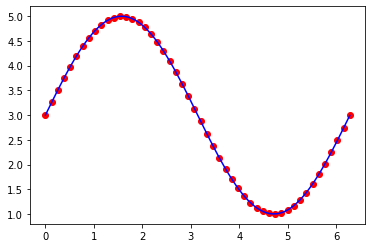

In [23]:
plot_fp(results3.x)

Y listo :-).

Después de esto, al menos en teoría, ya deberías ser capaz de resolver cualquier problema de mínimos cuadrados usando minimize :-D.
